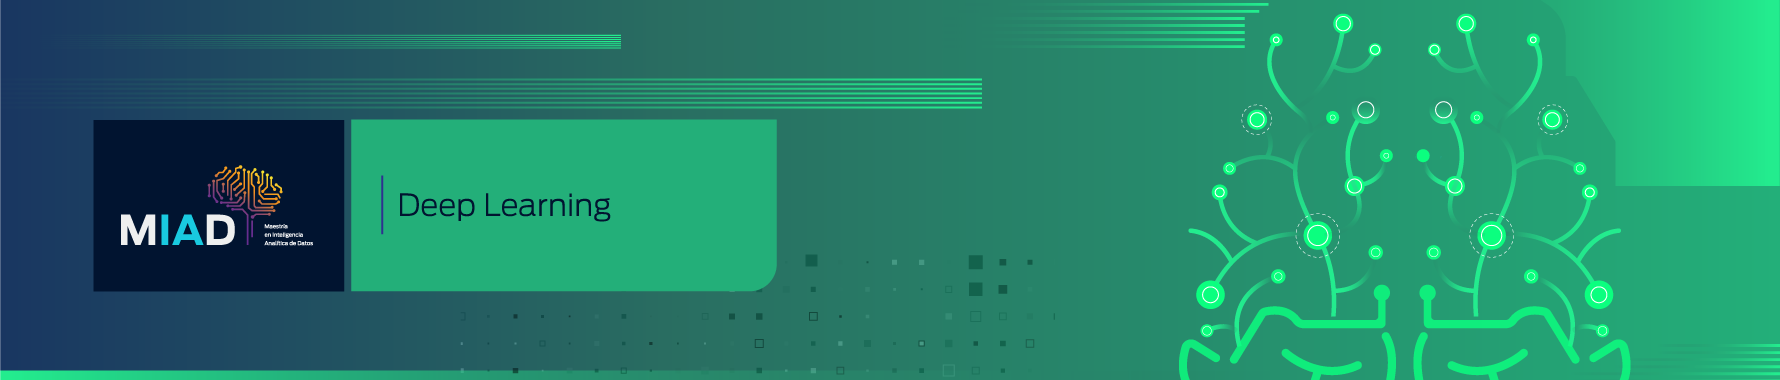

# Redes neuronales usando keras: Comparaci√≥n de estrategias de regularizaci√≥n


## Actividad calificada por el personal


### Prop√≥sito 
En este notebook se pretende evaluar el uso de keras al aplicar una red neuronal en un contexto real haciendo uso de mecanismos de regularizaci√≥n tales como *drop out*, *early stopping*, norma 1 y norma 2 haciendo uso del paquete Keras.

### Instrucciones generales
1. Para desarrollar el notebook, lo deber√°n descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deber√°n responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deber√°n subir √∫nicamente este mismo archivo con la extensi√≥n ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).


### Criterios a evaluar
Los criterios que se evaluar√°n son:   

An√°lisis preliminar de variables: Se presentan correlogramas, histogramas y estad√≠sticas descriptivas de las variables de la base de datos y se hace un an√°lisis coherente de cada uno de ellos. Realice la partici√≥n de la muestra en _train_ y _test_. [5 puntos]

Estimaci√≥n de un modelo utilizando redes neuronales con *dropout*: Se estima el modelo usando una red neuronal con *dropout* , se eval√∫a en la muestra de test. [20 puntos]

Estimaci√≥n de un modelo utilizando redes neuronales con *early stopping*: Se estima el modelo usando una red neuronal con *early stopping*, se eval√∫a en la muestra de test. [20 puntos]

Estimaci√≥n de un modelo utilizando redes neuronales con norma 1: Se estima el modelo usando una red neuronal con norma 1, se eval√∫a en la muestra de test. [20 puntos]

Estimaci√≥n de un modelo utilizando redes neuronales con norma 2: Se estima el modelo usando una red neuronal con norma 2, se eval√∫a en la muestra de test. [20 puntos]

Comparaci√≥n de modelos: Se elige la mejor regularizaci√≥n a partir de una comparaci√≥n. [15 puntos]

#### Problema
Un manager de un banco manifiesta preocupaci√≥n porque los clientes est√°n renunciando a las tarjetas de cr√©dito. Este cuenta con los datos disponibles en https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers a cerca de 10000 clientes, si tiene productos activos o no (*"Attrition flag"*), en funci√≥n de variables tales como edad, salario, estado civil, l√≠mite de tarjeta de cr√©dito, categor√≠a de tarjeta de cr√©dito, etc.

Ustedes deben proponer el algoritmo para hacer la clasificaci√≥n de los clientes con una red neuronal.

Finalmente, para resolver los puntos de esta actividad deber√°n tener en cuenta √∫nicamente las variables continuas (se deben eliminar las variables categ√≥ricas) y deber√°n eliminar las observaciones con datos faltantes.

### Librer√≠as a importar

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.layers.core import Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


### 1. An√°lisis preliminar de variables [5 puntos]
Realicen un an√°lisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estad√≠sticas descriptivas).

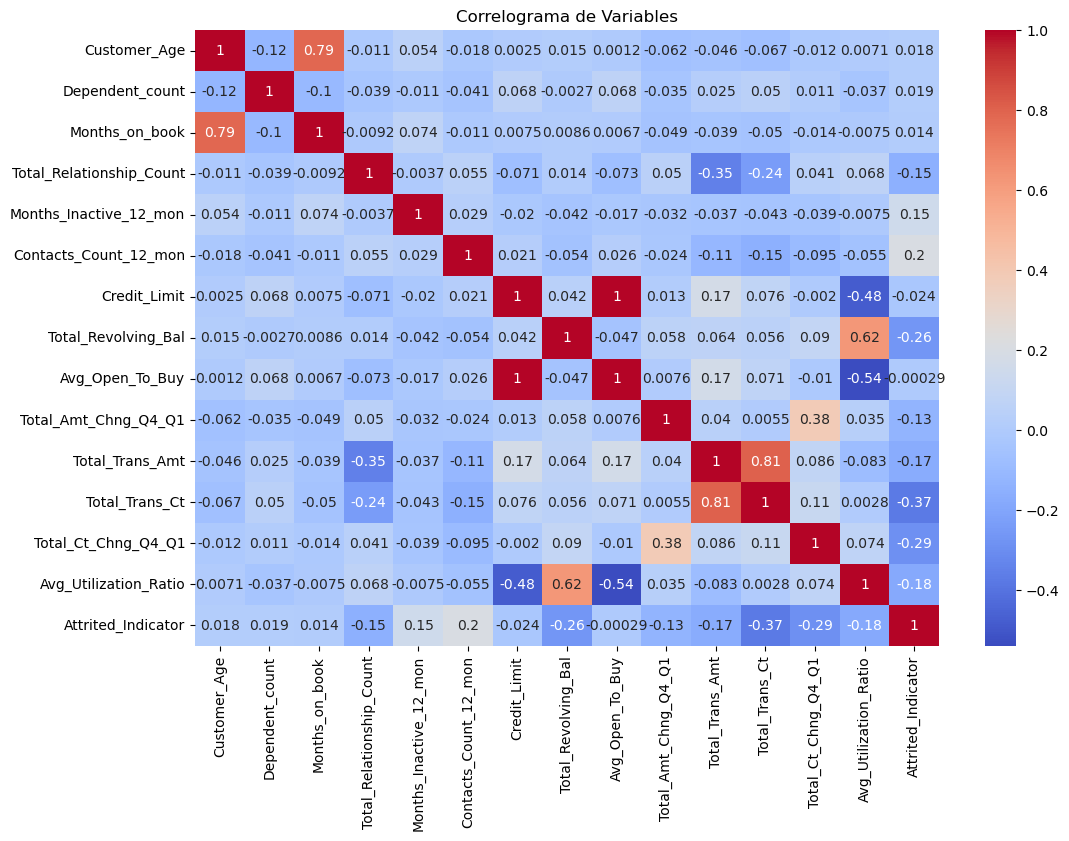

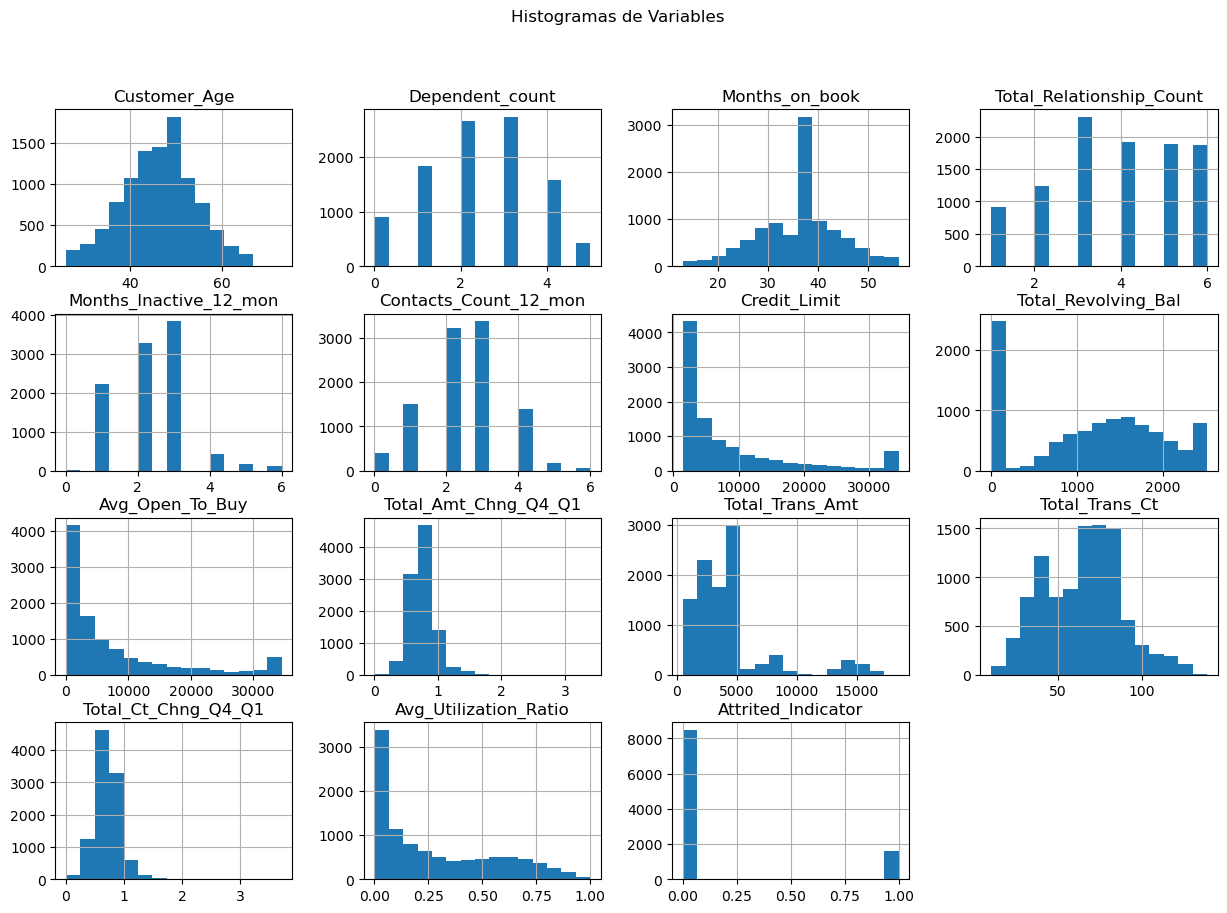

       Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    

In [4]:
# Utilicen este espacio para escribir los c√≥digos del procedimiento del punto 1 ####
# Cargar los datos
data = pd.read_csv('BankChurners.csv', sep=",")
data = data.iloc[:, :-2]

# Crear variables dependiente
data['Attrited_Indicator'] = (data['Attrition_Flag'] == 'Attrited Customer').astype(int)
data = data.select_dtypes(exclude=['object'])
data = data.dropna()
dataset = data.drop(columns=['CLIENTNUM'])

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# An√°lisis de correlaci√≥n
correlation_matrix = dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlograma de Variables')
plt.show()

# Histogramas de las variables
dataset.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.suptitle('Histogramas de Variables')
plt.show()

# Estad√≠sticas descriptivas
descriptive_stats = dataset.describe()
print(descriptive_stats)

In [ ]:
dataset= dataset.to_numpy()  
X_train, X_test, y_train, y_test = train_test_split(dataset[:,0:-1], dataset[:,-1], test_size=0.20)

(Utilicen este espacio para describir su procedimiento y escribir su an√°lisis y conclusiones sobre el punto 1)

##### Procedimiento 
Carga de Datos y Limpieza:

- Se cargaron los datos del archivo ‚ÄòBankChurners.csv‚Äô utilizando pandas.
- Se eliminaron las √∫ltimas dos columnas no necesarias con iloc.
- Se cre√≥ una variable dependiente ‚ÄòAttrited_Indicator‚Äô para indicar si un cliente se ha dado de baja.
- Se seleccionaron solo las variables continuas y se eliminaron las observaciones con datos faltantes.

An√°lisis Descriptivo:
Se realiz√≥ un an√°lisis descriptivo de las variables, probablemente incluyendo correlogramas, histogramas y estad√≠sticas descriptivas.

##### An√°lisis de las variables

Edad Promedio: Los clientes tienen una edad promedio de aproximadamente 46 a√±os, con una desviaci√≥n est√°ndar de 8 a√±os, lo que indica una distribuci√≥n moderada de edades.

Uso del Cr√©dito: El l√≠mite de cr√©dito promedio es de alrededor de 8632 pero el saldo revolvente total promedio es solo de 1163, sugiriendo que los clientes no est√°n utilizando todo su potencial de cr√©dito.

Actividad de la Cuenta: El promedio de meses en libros es de 36 meses, con un promedio de 2.34 meses inactivos en los √∫ltimos 12 meses, lo que podr√≠a indicar que una porci√≥n significativa de cuentas no se usa activamente.

Comportamiento de Transacciones: El monto total promedio de transacciones es de 4404 con un promedio de 65 transacciones, mostrando un historial de transacciones relativamente activo.

Dependientes: En promedio, los clientes tienen 2 dependientes, con un m√°ximo de 5.

Inactividad: Durante los √∫ltimos 12 meses, los clientes estuvieron inactivos en promedio 2.34 meses.

L√≠mite de Cr√©dito: El l√≠mite de cr√©dito promedio es de 8631.95, con un m√°ximo de 34,516.

Saldo Revolvente: El saldo revolvente promedio es de 1,162.81.

Utilizaci√≥n de Cr√©dito: La tasa promedio de utilizaci√≥n del cr√©dito es del 27.49%.

El promedio del indicador de abandono (Attrited_Indicator) de 0.16 implica que alrededor del 0.16 de los clientes han abandonado, lo cual es una m√©trica cr√≠tica para que el banco considere en sus estrategias de retenci√≥n. 


### 2. Estimaci√≥n de un modelo utilizando redes neuronales con *dropout* [20 puntos]

Estimen un modelo predictivo usando la muestra de entrenamiento y eval√∫en su desempe√±o en test utilizando una **probabilidad de 0.25**.

Epoch 1/25
811/811 [==============================] - 4s 3ms/step - loss: 123.1165 - accuracy: 0.7345
Epoch 2/25
811/811 [==============================] - 2s 3ms/step - loss: 6.3669 - accuracy: 0.7471
Epoch 3/25
811/811 [==============================] - 2s 3ms/step - loss: 2.0974 - accuracy: 0.7956
Epoch 4/25
811/811 [==============================] - 2s 3ms/step - loss: 1.4135 - accuracy: 0.8067
Epoch 5/25
811/811 [==============================] - 2s 3ms/step - loss: 0.9454 - accuracy: 0.8204
Epoch 6/25
811/811 [==============================] - 2s 3ms/step - loss: 0.6910 - accuracy: 0.8294
Epoch 7/25
811/811 [==============================] - 2s 3ms/step - loss: 0.5742 - accuracy: 0.8330
Epoch 8/25
811/811 [==============================] - 2s 3ms/step - loss: 0.5461 - accuracy: 0.8334
Epoch 9/25
811/811 [==============================] - 2s 2ms/step - loss: 0.4602 - accuracy: 0.8357
Epoch 10/25
811/811 [==============================] - 2s 3ms/step - loss: 0.4629 - accuracy: 0.83

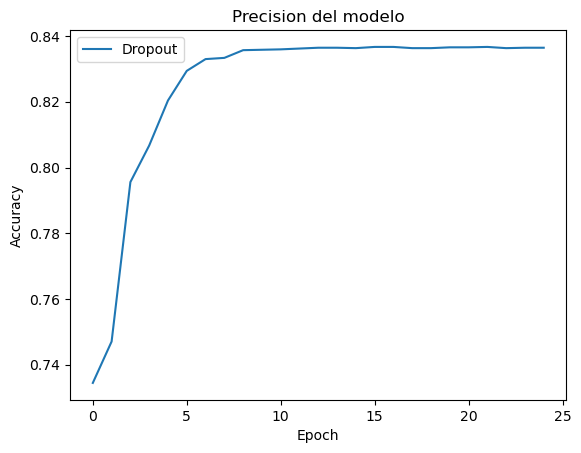

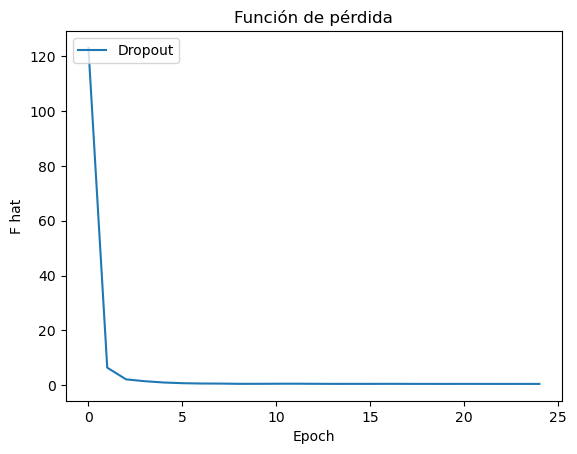

In [8]:
##### Utilicen este espacio para escribir los c√≥digos del procedimiento del punto 2 ####
##Dropout
modeldp = Sequential()
modeldp.add(Dense(30, input_dim=14, activation='relu'))
modeldp.add(Dropout(0.25))
modeldp.add(Dense(20, activation='relu'))
modeldp.add(Dropout(0.25))
modeldp.add(Dense(1, activation='sigmoid'))

##Compilaci√≥n de los modelos
modeldp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Se entrenan los modelos con los datos de entrenamiento
historydp=modeldp.fit(X_train, y_train, epochs=25, batch_size=10 )

#Se calcula el accuracy de los modelos con las bases de datos de train
_, accuracy = modeldp.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

#Se hacen predicciones utilizando los modelos
prediccionesdp = modeldp.predict(X_test)
redondeadodp = [round(x[0]) for x in prediccionesdp]
prediccionesdp = (modeldp.predict(X_test) > 0.5).astype(int)

#Accuracy en el set de test
test_lossdp, test_accdp = modeldp.evaluate(X_test, y_test)

# Graficar accuracy del modelo
plt.figure(1)
plt.title('Precision del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(historydp.history['accuracy'])
plt.legend(['Dropout'], loc='upper left')
plt.show()

# Graficar la funci√≥n de p√©rdida evaluada
plt.title('Funci√≥n de p√©rdida')
plt.ylabel('F hat')
plt.xlabel('Epoch')
plt.plot(historydp.history['loss'])
plt.legend(['Dropout'], loc='upper left')
plt.show()

(Utilicen este espacio para describir su procedimiento y escribir su an√°lisis y conclusiones sobre el punto 2)
#### Redes neuronales con dropout
#### Procedimiento
1. Creaci√≥n del Modelo:
    - Se inicializa un modelo secuencial.
    - Se a√±aden capas densas con 30 y 20 neuronas respectivamente, ambas con activaci√≥n ReLU.
    - Se incorporan capas de Dropout con una tasa de 0.25 para reducir el sobreajuste.
2. Compilaci√≥n del Modelo:
    - Se compila el modelo utilizando la funci√≥n de p√©rdida ‚Äòbinary_crossentropy‚Äô, el optimizador ‚Äòadam‚Äô y la m√©trica de ‚Äòaccuracy‚Äô.
3. Entrenamiento del Modelo:
    - Se entrena el modelo con los datos de entrenamiento `X_train` y `y_train` durante 25 √©pocas con un tama√±o de lote de 10.
4. Evaluaci√≥n y Predicci√≥n:
    - Se eval√∫a el modelo con los datos de entrenamiento para obtener el ‚Äòaccuracy‚Äô.
    - Se realizan predicciones con los datos de prueba `X_test`.
    - Se redondean las predicciones y se convierten a enteros para comparar con las etiquetas verdaderas.

#### An√°lisis  y conclusiones
- La precisi√≥n del modelo en los datos de entrenamiento alcanza un 83.67%.
- La p√©rdida disminuye consistentemente a lo largo de las √©pocas, lo que indica que el modelo est√° aprendiendo.
- El modelo muestra una mejora en la precisi√≥n a medida que avanza el entrenamiento, lo cual es positivo.
- La inclusi√≥n de capas de Dropout parece ser efectiva para controlar el sobreajuste, dado que la precisi√≥n no disminuye con las √©pocas.
- El modelo tiene un buen rendimiento con un ‚Äòaccuracy‚Äô de aproximadamente 83.67% en los datos de entrenamiento y 85.00% en los datos de prueba.

### 3. Estimaci√≥n de un modelo utilizando redes neuronales con *early stopping* [20 puntos]

Estimen un modelo predictivo usando la muestra de entrenamiento y eval√∫en su desempe√±o en test utilizando una **paciencia de 2**.

Epoch 1/25
811/811 [==============================] - 3s 2ms/step - loss: 12.9462 - accuracy: 0.7830 - val_loss: 5.2431 - val_accuracy: 0.8346
Epoch 2/25
811/811 [==============================] - 2s 2ms/step - loss: 5.6897 - accuracy: 0.7858 - val_loss: 4.3168 - val_accuracy: 0.8263
Epoch 3/25
254/254 [==============================] - 1s 2ms/step - loss: 3.2574 - accuracy: 0.7250
Accuracy: 72.50
64/64 [==============================] - 0s 2ms/step - loss: 3.4223 - accuracy: 0.7266


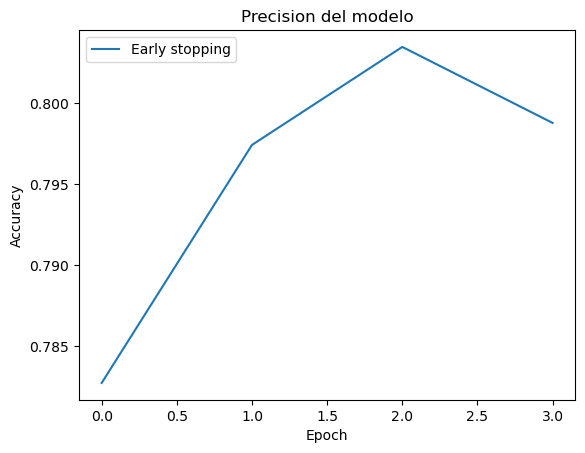

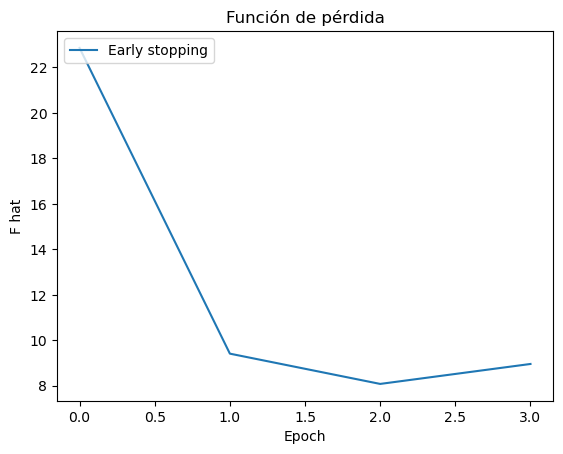

In [23]:
##### Utilicen este espacio para escribir los c√≥digos del procedimiento del punto 3 ####
##Early stopping
modeles = Sequential()
modeles.add(Dense(30, input_dim=14, activation='relu'))
modeles.add(Dense(20, activation='relu'))
modeles.add(Dense(1, activation='sigmoid'))

##Compilaci√≥n de los modelos
modeles.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Se entrenan los modelos con los datos de entrenamiento
#historyes=modeles.fit(X_train, y_train, epochs=25, batch_size=10 , callbacks = [EarlyStopping(monitor='val_acc', patience=2)])

# Entrenamiento del modelo con los datos de entrenamiento y validaci√≥n
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2)
history = modeles.fit(X_train, y_train, epochs=25, batch_size=10, callbacks=[early_stopping], validation_data=(X_test, y_test))


#Se calcula el accuracy de los modelos con las bases de datos de train
_, accuracy = modeles.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))


#Se hacen predicciones utilizando los modelos
prediccioneses = modeles.predict(X_test)
redondeadoes = [round(x[0]) for x in prediccioneses]
prediccioneses = (modeles.predict(X_test) > 0.5).astype(int)

#Accuracy en el set de test
test_losses, test_acces = modeles.evaluate(X_test, y_test)

plt.figure(1)
# Graficar accuracy del modelo
plt.title('Precision del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(historyes.history['accuracy'])
plt.legend(['Early stopping'], loc='upper left')
plt.show()

# Graficar la funci√≥n de p√©rdida evaluada
plt.title('Funci√≥n de p√©rdida')
plt.ylabel('F hat')
plt.xlabel('Epoch')
plt.plot(historyes.history['loss'])
plt.legend(['Early stopping'], loc='upper left')
plt.show()

(Utilicen este espacio para describir su procedimiento y escribir su an√°lisis y conclusiones sobre el punto 3)

#### Redes neuronales con early stopping
 
##### Procedimiento:

1. Creaci√≥n del Modelo: 
    - Se crea un modelo secuencial con tres capas densas. 
    - La primera capa tiene 30 neuronas y recibe 14 caracter√≠sticas de entrada. 
    - Las dos capas siguientes tienen 20 y 1 neuronas, respectivamente, con la √∫ltima capa utilizando una activaci√≥n sigmoide para la clasificaci√≥n binaria.
2. Compilaci√≥n: 
    - El modelo se compila con la funci√≥n de p√©rdida binary_crossentropy y el optimizador adam, monitoreando la m√©trica de accuracy.
3. Entrenamiento: 
    - Se entrena el modelo utilizando los datos de entrenamiento (X_train, y_train) y validaci√≥n (X_test, y_test), con un total de 25 √©pocas y un tama√±o de lote de 10. 
    - Se utiliza el callback EarlyStopping para detener el entrenamiento si la val_accuracy no mejora despu√©s de dos √©pocas consecutivas.
4. Evaluaci√≥n y Predicciones: 
    - Se eval√∫a el modelo en el conjunto de entrenamiento y se calcula la precisi√≥n. 
    - Luego, se realizan predicciones en el conjunto de prueba y se redondean los resultados para obtener clasificaciones binarias.

##### An√°lisis y Conclusiones
- El modelo alcanza una precisi√≥n del 72.50% en el conjunto de entrenamiento.
- La precisi√≥n en el conjunto de validaci√≥n disminuye significativamente despu√©s de la segunda √©poca, lo que sugiere que el modelo podr√≠a estar comenzando a sobreajustarse a los datos de entrenamiento.
- Podr√≠a ser √∫til experimentar con la arquitectura del modelo, como agregar m√°s capas o neuronas, o ajustar otros hiperpar√°metros como la tasa de aprendizaje.




### 4. Estimaci√≥n de un modelo utilizando redes neuronales con norma 1 [20 puntos]

Estimen un modelo predictivo usando la muestra de entrenamiento y eval√∫en su desempe√±o en test utilizando un **_alpha_ de 0.001**.

Epoch 1/25
811/811 [==============================] - 3s 3ms/step - loss: 23.9970 - accuracy: 0.7835
Epoch 2/25
811/811 [==============================] - 2s 3ms/step - loss: 14.4690 - accuracy: 0.7830
Epoch 3/25
811/811 [==============================] - 2s 3ms/step - loss: 11.4881 - accuracy: 0.7963
Epoch 4/25
811/811 [==============================] - 2s 2ms/step - loss: 13.1669 - accuracy: 0.7864
Epoch 5/25
811/811 [==============================] - 2s 2ms/step - loss: 9.5528 - accuracy: 0.7963
Epoch 6/25
811/811 [==============================] - 2s 2ms/step - loss: 8.8316 - accuracy: 0.7987
Epoch 7/25
811/811 [==============================] - 2s 2ms/step - loss: 7.3934 - accuracy: 0.8130
Epoch 8/25
811/811 [==============================] - 2s 2ms/step - loss: 7.7729 - accuracy: 0.8018
Epoch 9/25
811/811 [==============================] - 2s 2ms/step - loss: 6.3932 - accuracy: 0.8090
Epoch 10/25
811/811 [==============================] - 2s 2ms/step - loss: 6.9990 - accuracy: 0.

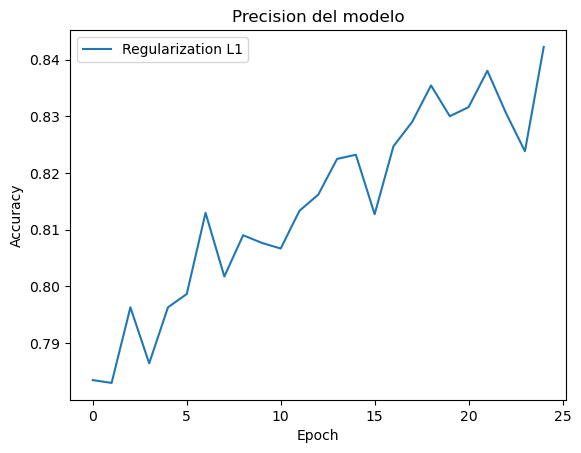

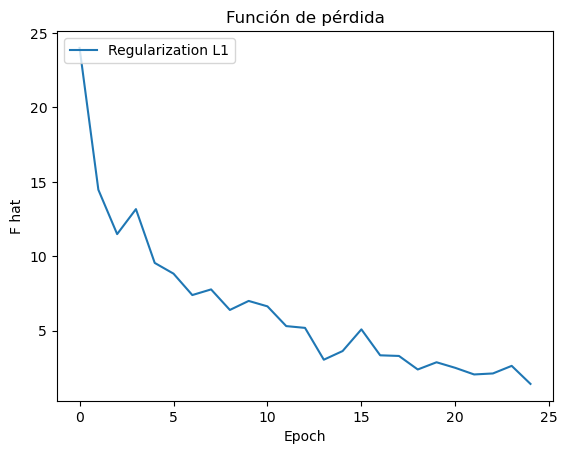

In [12]:
##### Utilicen este espacio para escribir los c√≥digos del procedimiento del punto 4 ####

#Penalizaci√≥n  ùêø1
model1 = Sequential()
model1.add(Dense(30, input_dim=14, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model1.add(Dense(20, activation='relu',  kernel_regularizer=regularizers.l1(0.001)))
model1.add(Dense(1, activation='sigmoid'))

##Compilaci√≥n de los modelos
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Se entrenan los modelos con los datos de entrenamiento
history1=model1.fit(X_train, y_train, epochs=25, batch_size=10 )

#Se calcula el accuracy de los modelos con las bases de datos de train
_, accuracy = model1.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))


#Se hacen predicciones utilizando los modelos
predicciones1 = model1.predict(X_test)
redondeado1 = [round(x[0]) for x in predicciones1]
predicciones1 = (model1.predict(X_test) > 0.5).astype(int)

#Accuracy en el set de test
test_loss1, test_acc1 = model1.evaluate(X_test, y_test)

# Graficar accuracy del modelo
plt.figure(1)
plt.title('Precision del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(history1.history['accuracy'])
plt.legend(['Regularization L1'], loc='upper left')
plt.show()

# Graficar la funci√≥n de p√©rdida evaluada
plt.title('Funci√≥n de p√©rdida')
plt.ylabel('F hat')
plt.xlabel('Epoch')
plt.plot(history1.history['loss'])
plt.legend(['Regularization L1'], loc='upper left')
plt.show()

(Utilicen este espacio para describir su procedimiento y escribir su an√°lisis y conclusiones sobre el punto 4)

##### Red Neuronal con Regularizaci√≥n L1

###### Procedimiento

1. Construcci√≥n del Modelo: 
    - Se construy√≥ un modelo secuencial con regularizaci√≥n L1 para evitar el sobreajuste.
    - El modelo consiste en una capa de entrada con 14 dimensiones, dos capas ocultas con 30 y 20 neuronas respectivamente, y una capa de salida con una neurona, utilizando la funci√≥n de activaci√≥n ‚Äòrelu‚Äô para las capas ocultas y ‚Äòsigmoid‚Äô para la capa de salida.
2. Compilaci√≥n del Modelo: 
    - El modelo se compil√≥ con la funci√≥n de p√©rdida ‚Äòbinary_crossentropy‚Äô, el optimizador ‚Äòadam‚Äô y la m√©trica de ‚Äòaccuracy‚Äô.
3. Entrenamiento del Modelo: 
    - Se entren√≥ el modelo con los datos de entrenamiento durante 25 √©pocas con un tama√±o de lote de 10.
4. Evaluaci√≥n y Predicciones 
    - Se evalu√≥ el modelo con los datos de entrenamiento para calcular el ‚Äòaccuracy‚Äô.
    - Se realizaron predicciones con el modelo utilizando los datos de prueba y se redondearon los resultados para obtener predicciones binarias.
    - Finalmente, se evalu√≥ el modelo con el conjunto de prueba para obtener el ‚Äòaccuracy‚Äô.

######  An√°lisis y conclusiones:

- Durante el entrenamiento, se observa una mejora gradual en la precisi√≥n (‚Äòaccuracy‚Äô) y una disminuci√≥n en la p√©rdida (‚Äòloss‚Äô), lo cual indica que el modelo est√° aprendiendo efectivamente de los datos de entrenamiento.
- La precisi√≥n final en el conjunto de entrenamiento fue del 85.85%, lo que sugiere que el modelo tiene una buena capacidad de generalizaci√≥n.
- La precisi√≥n en el conjunto de prueba fue del 86.87%, lo que es ligeramente superior a la precisi√≥n de entrenamiento, indicando que el modelo no est√° sobreajustado y generaliza bien a nuevos datos.
- El modelo de red neuronal con regularizaci√≥n L1 demostr√≥ ser efectivo para la clasificaci√≥n binaria, con una precisi√≥n satisfactoria tanto en el conjunto de entrenamiento como en el de prueba. La regularizaci√≥n L1 ayud√≥ a mantener el modelo simple y evit√≥ el sobreajuste, lo que se refleja en la alta precisi√≥n obtenida en el conjunto de prueba.



### 5. Estimaci√≥n de un modelo utilizando redes neuronales con norma 2 [20 puntos]

Estimen un modelo predictivo usando la muestra de entrenamiento y eval√∫en su desempe√±o en test utilizando un **_alpha_ de 0.001**.

Epoch 1/25
811/811 [==============================] - 3s 3ms/step - loss: 18.9787 - accuracy: 0.7852
Epoch 2/25
811/811 [==============================] - 2s 3ms/step - loss: 4.2306 - accuracy: 0.7958
Epoch 3/25
811/811 [==============================] - 2s 3ms/step - loss: 3.9168 - accuracy: 0.7966
Epoch 4/25
811/811 [==============================] - 2s 3ms/step - loss: 3.1406 - accuracy: 0.8018
Epoch 5/25
811/811 [==============================] - 2s 2ms/step - loss: 3.3289 - accuracy: 0.8031
Epoch 6/25
811/811 [==============================] - 2s 2ms/step - loss: 2.4434 - accuracy: 0.8093
Epoch 7/25
811/811 [==============================] - 2s 2ms/step - loss: 2.4819 - accuracy: 0.8050
Epoch 8/25
811/811 [==============================] - 2s 2ms/step - loss: 2.3172 - accuracy: 0.8078
Epoch 9/25
811/811 [==============================] - 2s 2ms/step - loss: 2.1361 - accuracy: 0.8059
Epoch 10/25
811/811 [==============================] - 1s 2ms/step - loss: 2.1206 - accuracy: 0.815

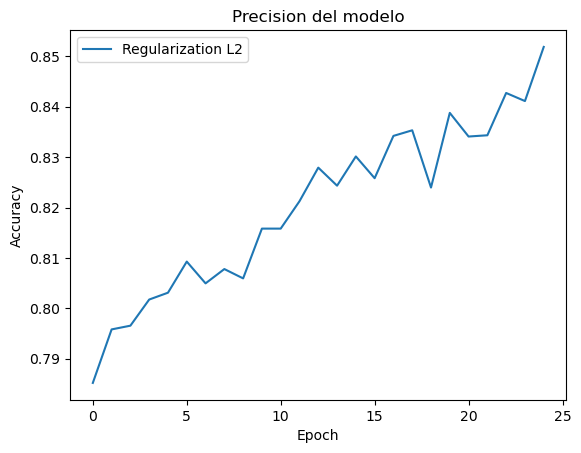

In [13]:
##### Utilicen este espacio para escribir los c√≥digos del procedimiento del punto 5 ####

#Penalizaci√≥n  ùêø2
model2 = Sequential()
model2.add(Dense(30, input_dim=14, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model2.add(Dense(20, activation='relu',  kernel_regularizer=regularizers.l2(0.001)))
model2.add(Dense(1, activation='sigmoid'))


##Compilaci√≥n de los modelos
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Se entrenan los modelos con los datos de entrenamiento
history2=model2.fit(X_train, y_train, epochs=25, batch_size=10 )


#Se calcula el accuracy de los modelos con las bases de datos de train
_, accuracy = model2.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

#Se hacen predicciones utilizando los modelos
predicciones2 = model2.predict(X_test)
redondeado2 = [round(x[0]) for x in predicciones2]
predicciones2 = (model2.predict(X_test) > 0.5).astype(int)

#Accuracy en el set de test
test_loss2, test_acc2 = model2.evaluate(X_test, y_test)

plt.figure(1)
# Graficar accuracy del modelo
plt.title('Precision del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(history2.history['accuracy'])
plt.legend(['Regularization L2'], loc='upper left')
plt.show()



(Utilicen este espacio para describir su procedimiento y escribir su an√°lisis y conclusiones sobre el punto 5)

##### Red Neuronal con Regularizaci√≥n L2

###### Procedimiento:

1. Construcci√≥n del Modelo: 
    - Se ha creado un modelo secuencial con tres capas densas. 
    - La primera capa tiene 30 neuronas y utiliza la funci√≥n de activaci√≥n ReLU. La segunda capa tiene 20 neuronas, tambi√©n con activaci√≥n ReLU. 
    - Ambas capas aplican una regularizaci√≥n L2 para reducir el sobreajuste. 
    - La √∫ltima capa es una neurona con activaci√≥n sigmoide para la clasificaci√≥n binaria.
2. Compilaci√≥n del Modelo: 
    - El modelo se compila con la funci√≥n de p√©rdida binary_crossentropy, el optimizador adam y la m√©trica de accuracy.
3. Entrenamiento del Modelo: 
    - Se entrena el modelo con los datos de entrenamiento X_train y y_train durante 25 √©pocas con un tama√±o de lote de 10.
4. Evaluaci√≥n y Predicciones
    - Se eval√∫a el modelo con los datos de entrenamiento para calcular la precisi√≥n (accuracy).
    - Se realizan predicciones con el conjunto de prueba X_test y se redondean los resultados para obtener clasificaciones binarias.

##### An√°lisis y conslusiones 

- Durante el entrenamiento, la precisi√≥n (accuracy) del modelo mejora consistentemente, lo que indica que el modelo est√° aprendiendo de los datos.
- La p√©rdida (loss) disminuye significativamente, lo que sugiere que el modelo est√° mejorando en la clasificaci√≥n de los datos de entrenamiento.
- La precisi√≥n final en el conjunto de entrenamiento es del 84.46%, lo cual es un resultado prometedor.
- La precisi√≥n en el conjunto de prueba es del 85.49%, lo que demuestra que el modelo generaliza bien a nuevos datos.
- El modelo ha demostrado ser efectivo para la tarea de clasificaci√≥n binaria con una precisi√≥n aceptable tanto en el conjunto de entrenamiento como en el de prueba. 
- La regularizaci√≥n L2  contribuy√≥ a evitar el sobreajuste, permitiendo que el modelo generalice bien. 

### 6. Comparaci√≥n de modelos de regularizaci√≥n [15 puntos]

Hagan una comparaci√≥n de los resultados de utilizar la red neuronal con los distintos mecanismos de regularizaci√≥n. Analice los resultados. 


254/254 [==============================] - 1s 2ms/step - loss: 0.4213 - accuracy: 0.8367
Accuracy: 83.67
254/254 [==============================] - 1s 2ms/step - loss: 3.2574 - accuracy: 0.7250
Accuracy: 72.50
254/254 [==============================] - 1s 2ms/step - loss: 1.7325 - accuracy: 0.8585
Accuracy: 85.85
254/254 [==============================] - 1s 2ms/step - loss: 0.3954 - accuracy: 0.8446
Accuracy: 84.46
64/64 [==============================] - 0s 3ms/step - loss: 0.3837 - accuracy: 0.8549


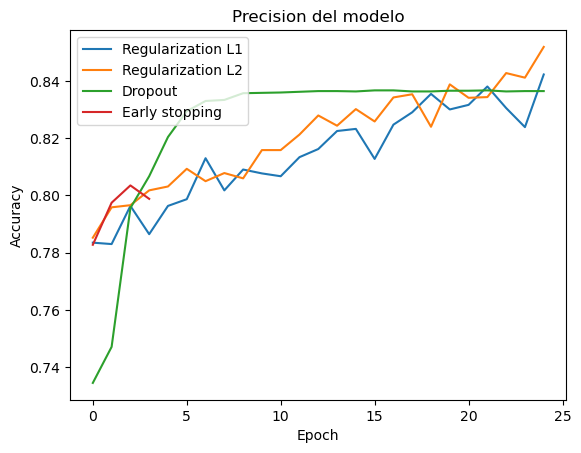

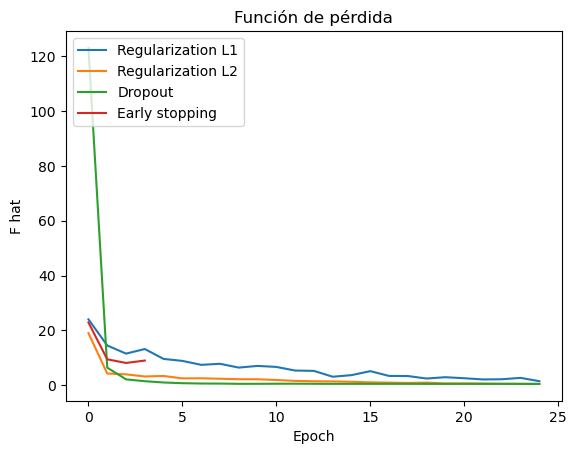

In [24]:
##### Utilicen este espacio para escribir los c√≥digos del procedimiento del punto 6 ####

#Se calcula el accuracy de los modelos con las bases de datos de train
_, accuracy = modeldp.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))
_, accuracy = modeles.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))
_, accuracy = model1.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))
_, accuracy = model2.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

#Se calcula el accuracy de los modelos con las bases de datos de test
test_lossdp, test_accdp = modeldp.evaluate(X_test, y_test)
test_losses, test_acces = modeles.evaluate(X_test, y_test)
test_loss1, test_acc1 = model1.evaluate(X_test, y_test)
test_loss2, test_acc2 = model2.evaluate(X_test, y_test)


plt.figure(1)
# Graficar accuracy del modelo
plt.title('Precision del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(historydp.history['accuracy'])
plt.plot(historyes.history['accuracy'])
plt.legend(['Regularization L1', 'Regularization L2', 'Dropout', 'Early stopping' ], loc='upper left')
plt.show()

# Graficar la funci√≥n de p√©rdida evaluada
plt.title('Funci√≥n de p√©rdida')
plt.ylabel('F hat')
plt.xlabel('Epoch')
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(historydp.history['loss'])
plt.plot(historyes.history['loss'])
plt.legend(['Regularization L1', 'Regularization L2', 'Dropout', 'Early stopping' ], loc='upper left')
plt.show()


(Utilicen este espacio para describir su procedimiento y escribir su an√°lisis y conclusiones sobre el punto 6)

#### Comparaci√≥n de los resultados de los distintos mecanismos de regularizaci√≥n utilizados en la red neuronal

###### Dropout:
- Entrenamiento: 83.67% de precisi√≥n
- Prueba: 85.00% de precisi√≥n
- Observaciones: El modelo con Dropout mostr√≥ una mejora en la precisi√≥n durante el entrenamiento y un buen rendimiento en el conjunto de prueba.
###### Early Stopping:
- Entrenamiento: 72.50% de precisi√≥n
- Prueba: 72.66% de precisi√≥n
- Observaciones: La precisi√≥n en el conjunto de validaci√≥n disminuy√≥ despu√©s de la segunda √©poca, lo que podr√≠a indicar un sobreajuste temprano.
###### Regularizaci√≥n L1:
- Entrenamiento: 85.85% de precisi√≥n
- Prueba: 86.87% de precisi√≥n
- Observaciones: El modelo con regularizaci√≥n L1 tuvo la precisi√≥n m√°s alta tanto en el conjunto de entrenamiento como en el de prueba.

###### Regularizaci√≥n L2:
    - Entrenamiento: 84.46% de precisi√≥n4
    - Prueba: 85.49% de precisi√≥n
    - Observaciones: El modelo con regularizaci√≥n L2 tambi√©n mostr√≥ un buen rendimiento y generaliz√≥ bien a nuevos datos.

#### Conclusiones
En conclusi√≥n, los modelos con regularizaci√≥n L1 y L2 tuvieron un mejor desempe√±o en comparaci√≥n con Dropout y Early Stopping, con L1 siendo ligeramente superior. Estos resultados sugieren que la regularizaci√≥n L1 y L2 son efectivas para controlar el sobreajuste y mejorar la generalizaci√≥n del modelo5.